<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Libraries</a></span></li></ul></li><li><span><a href="#Income-Dataframe" data-toc-modified-id="Income-Dataframe-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Income Dataframe</a></span></li><li><span><a href="#Population-Dataframe" data-toc-modified-id="Population-Dataframe-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Population Dataframe</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Distribution-of-years" data-toc-modified-id="Distribution-of-years-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Distribution of years</a></span></li><li><span><a href="#Missing-Values" data-toc-modified-id="Missing-Values-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Missing Values</a></span></li></ul></li></ul></li><li><span><a href="#Income-and-Population-df" data-toc-modified-id="Income-and-Population-df-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Income and Population df</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Merge" data-toc-modified-id="Merge-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Merge</a></span></li><li><span><a href="#Re-naming-headers" data-toc-modified-id="Re-naming-headers-3.0.2"><span class="toc-item-num">3.0.2&nbsp;&nbsp;</span>Re-naming headers</a></span></li><li><span><a href="#Replacing-missing-population-values" data-toc-modified-id="Replacing-missing-population-values-3.0.3"><span class="toc-item-num">3.0.3&nbsp;&nbsp;</span>Replacing missing population values</a></span></li><li><span><a href="#Replacing-missing-gdp-ppp-values" data-toc-modified-id="Replacing-missing-gdp-ppp-values-3.0.4"><span class="toc-item-num">3.0.4&nbsp;&nbsp;</span>Replacing missing gdp ppp values</a></span></li><li><span><a href="#GDP-PPP" data-toc-modified-id="GDP-PPP-3.0.5"><span class="toc-item-num">3.0.5&nbsp;&nbsp;</span>GDP PPP</a></span></li></ul></li></ul></li><li><span><a href="#Gini-df" data-toc-modified-id="Gini-df-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Gini df</a></span><ul class="toc-item"><li><span><a href="#Cleaning" data-toc-modified-id="Cleaning-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Cleaning</a></span></li><li><span><a href="#Merging" data-toc-modified-id="Merging-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Merging</a></span></li><li><span><a href="#Correcting-or-replacing-values" data-toc-modified-id="Correcting-or-replacing-values-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Correcting or replacing values</a></span></li><li><span><a href="#Missing-quantile" data-toc-modified-id="Missing-quantile-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Missing quantile</a></span></li></ul></li><li><span><a href="#Task-1" data-toc-modified-id="Task-1-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Task 1</a></span></li></ul></div>

## Libraries

In [397]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from functions import * # local functions file
import pickle

from matplotlib.ticker import FuncFormatter

# Income Dataframe

In [398]:
df_ic = pd.read_csv('raw_data/word_income_distribution.csv')

In [399]:
# Looking at the df_ic dataframe
display(df_ic.head(2))
display(df_ic.info())
display(df_ic.describe())
df_ic.isna().sum()

,country,year_survey,quantile,nb_quantiles,income,gdpppp
0,ALB,2008,1,100,"728,89795",7297
1,ALB,2008,2,100,"916,66235",7297


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11599 entries, 0 to 11598
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   country       11599 non-null  object
 1   year_survey   11599 non-null  int64 
 2   quantile      11599 non-null  int64 
 3   nb_quantiles  11599 non-null  int64 
 4   income        11599 non-null  object
 5   gdpppp        11399 non-null  object
dtypes: int64(3), object(3)
memory usage: 543.8+ KB


None

,year_survey,quantile,nb_quantiles
count,11599.000000,11599.000000,11599.0
mean,2007.982757,50.500819,100.0
std,0.909633,28.868424,0.0
min,2004.000000,1.000000,100.0
25%,2008.000000,25.500000,100.0
50%,2008.000000,51.000000,100.0
75%,2008.000000,75.500000,100.0
max,2011.000000,100.000000,100.0


country           0
year_survey       0
quantile          0
nb_quantiles      0
income            0
gdpppp          200
dtype: int64

First I will replace the commmas within the datafram with fullstops. 

In [400]:
df_ic['income'] = df_ic['income'].str.replace(',', '.').astype(float)
df_ic['gdpppp'] = df_ic['gdpppp'].str.replace(',', '.').astype(float)

In [401]:
df_ic.head(2)

,country,year_survey,quantile,nb_quantiles,income,gdpppp
0,ALB,2008,1,100,728.89795,7297.0
1,ALB,2008,2,100,916.66235,7297.0


In [402]:
top_5_income = df_ic.nlargest(5, 'income')
top_5_income

,country,year_survey,quantile,nb_quantiles,income,gdpppp
10998,USA,2008,100,100,176928.550,43261.0
4899,ISL,2008,100,100,160645.270,36527.0
3499,GBR,2008,100,100,141565.230,34048.0
1599,CAN,2008,100,100,133454.840,35895.0
3399,FRA,2008,100,100,122775.164,30357.0


In [403]:
bottom_5_income = df_ic.nsmallest(5, 'income')
bottom_5_income

,country,year_survey,quantile,nb_quantiles,income,gdpppp
1700,CHN,2007,1,100,16.719418,5712.00000
5700,KOR,2008,1,100,17.317732,19162.00000
1100,BOL,2008,1,100,20.584948,3950.00000
11499,COD,2008,1,100,29.364283,303.19305
6699,MDG,2010,1,100,29.411367,950.00000


In [404]:
# Let's check if there are any missing values:
df_ic[df_ic.isna().any(axis=1)]['country'].unique()

array(['XKX', 'PSE'], dtype=object)

We are missing PSE and XKX countries gdppp. I will replace thes later

# Population Dataframe

In [405]:
df_pop=pd.read_csv('raw_data/population.csv')

In [406]:
# Looking at df_pop dataframe
display(df_pop.head(2))
display(df_pop.info())
display(df_pop.describe())
df_pop.isna().sum()

,Country Name,Country Code,Indicator Name,Indicator Code,2004,2005,2006,2007,2008,2009,2010,2011
0,Aruba,ABW,"Population, total",SP.POP.TOTL,93540.0,94483.0,95606.0,96787.0,97996.0,99212.0,100341.0,101288.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,445281555.0,457153837.0,469508516.0,482406426.0,495748900.0,509410477.0,523459657.0,537792950.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   2004            265 non-null    float64
 5   2005            265 non-null    float64
 6   2006            265 non-null    float64
 7   2007            265 non-null    float64
 8   2008            265 non-null    float64
 9   2009            265 non-null    float64
 10  2010            265 non-null    float64
 11  2011            265 non-null    float64
dtypes: float64(8), object(4)
memory usage: 25.1+ KB


None

,2004,2005,2006,2007,2008,2009,2010,2011
count,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02
mean,2.598251e+08,2.633511e+08,2.668927e+08,2.704279e+08,2.740269e+08,2.776707e+08,2.813496e+08,2.850609e+08
std,8.216948e+08,8.321852e+08,8.426180e+08,8.529604e+08,8.634657e+08,8.741055e+08,8.848700e+08,8.958524e+08
min,9.791000e+03,9.912000e+03,1.003000e+04,1.014900e+04,1.024300e+04,1.023300e+04,1.024100e+04,1.028300e+04
25%,1.361172e+06,1.369075e+06,1.376919e+06,1.384861e+06,1.444277e+06,1.527196e+06,1.567220e+06,1.609017e+06
50%,8.791853e+06,9.026299e+06,9.080505e+06,9.148092e+06,9.219637e+06,9.298515e+06,9.483836e+06,9.726380e+06
75%,5.481561e+07,5.655025e+07,5.814398e+07,5.843831e+07,5.882673e+07,5.909536e+07,5.927742e+07,5.937945e+07
max,6.470924e+09,6.552700e+09,6.635110e+09,6.717568e+09,6.801441e+09,6.885663e+09,6.969986e+09,7.054044e+09


Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
2004              1
2005              1
2006              1
2007              1
2008              1
2009              1
2010              1
2011              1
dtype: int64

### Distribution of years

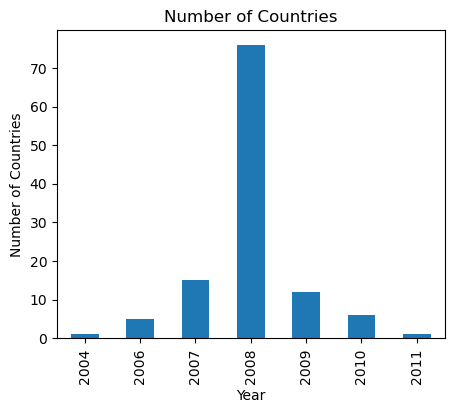

In [407]:

# Grouping by year_survey and counting unique countries for each year
survey_counts_per_year = df_ic.groupby('year_survey')['country'].nunique()

# Plotting the count of countries surveyed per year
survey_counts_per_year.plot(kind='bar', figsize=(5, 4))
plt.xlabel('Year')
plt.ylabel('Number of Countries')
plt.title('Number of Countries')
plt.show()


Majority the countries have 2008 data available, or 2007 and 2009, I am going to use 2008 data as population, and assume that the population values have not changed that significantly over the other years.

In [408]:
df_pop = df_pop[['Country Name', 'Country Code', '2008']]
df_pop.head(2)

,Country Name,Country Code,2008
0,Aruba,ABW,97996.0
1,Africa Eastern and Southern,AFE,495748900.0


### Missing Values

Checking for missing population values in df_pop

In [409]:
# Number of countries within df_pop
df_pop['Country Code'].nunique()

266

In [410]:
# Number of countries in the df_ic dataframe
df_ic['country'].nunique()

116

In [411]:
# Saving the unique countries of each dataframe
df_pop_countries = df_pop['Country Code'].unique()
df_ic_countries = df_ic['country'].unique()

In [412]:
#Lets check if there are any values that are missing from our population data
missing_country_codes = set(df_ic_countries) - set(df_pop_countries)
print(list(missing_country_codes))

['TWN']


Seems like, we don't have the population of TWN. I will add this later after the merge.

# Income and Population df

### Merge 

I will first make a merger, to get one dataframe. 

In [413]:
df = pd.merge(df_pop, df_ic, left_on='Country Code', right_on='country', how='right')

In [414]:
display(df.head())
display(df.info())
display(df.describe())
display(df.isna().sum())

,Country Name,Country Code,2008,country,year_survey,quantile,nb_quantiles,income,gdpppp
0,Albania,ALB,2947314.0,ALB,2008,1,100,728.89795,7297.0
1,Albania,ALB,2947314.0,ALB,2008,2,100,916.66235,7297.0
2,Albania,ALB,2947314.0,ALB,2008,3,100,1010.91600,7297.0
3,Albania,ALB,2947314.0,ALB,2008,4,100,1086.90780,7297.0
4,Albania,ALB,2947314.0,ALB,2008,5,100,1132.69970,7297.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11599 entries, 0 to 11598
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  11499 non-null  object 
 1   Country Code  11499 non-null  object 
 2   2008          11499 non-null  float64
 3   country       11599 non-null  object 
 4   year_survey   11599 non-null  int64  
 5   quantile      11599 non-null  int64  
 6   nb_quantiles  11599 non-null  int64  
 7   income        11599 non-null  float64
 8   gdpppp        11399 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 815.7+ KB


None

,2008,year_survey,quantile,nb_quantiles,income,gdpppp
count,1.149900e+04,11599.000000,11599.000000,11599.0,11599.000000,1.139900e+04
mean,5.411438e+07,2007.982757,50.500819,100.0,6069.224260,5.022128e+04
std,1.689444e+08,0.909633,28.868424,0.0,9414.185972,4.000688e+05
min,3.174140e+05,2004.000000,1.000000,100.0,16.719418,3.031931e+02
25%,4.501921e+06,2008.000000,25.500000,100.0,900.685515,2.576000e+03
50%,1.388942e+07,2008.000000,51.000000,100.0,2403.244900,7.560000e+03
75%,4.027377e+07,2008.000000,75.500000,100.0,7515.420900,1.877300e+04
max,1.324655e+09,2011.000000,100.000000,100.0,176928.550000,4.300332e+06


Country Name    100
Country Code    100
2008            100
country           0
year_survey       0
quantile          0
nb_quantiles      0
income            0
gdpppp          200
dtype: int64

In [415]:
df=df[['Country Name','country', '2008','quantile', 'income', 'gdpppp']]

In [416]:
df.head()

,Country Name,country,2008,quantile,income,gdpppp
0,Albania,ALB,2947314.0,1,728.89795,7297.0
1,Albania,ALB,2947314.0,2,916.66235,7297.0
2,Albania,ALB,2947314.0,3,1010.91600,7297.0
3,Albania,ALB,2947314.0,4,1086.90780,7297.0
4,Albania,ALB,2947314.0,5,1132.69970,7297.0


### Re-naming headers

In [417]:
df.columns = ['country_name', 'country_code', 'population', 'quantile', 'income', 'gdp_ppp']

### Replacing missing population values

Let's first add Taiwan's (TWN) population which in 2008 was 23,037,000

In [418]:
df[df['country_code'] == 'TWN'].head()

,country_name,country_code,population,quantile,income,gdp_ppp
10399,NaN,TWN,NaN,1,3477.1800,25342.0
10400,NaN,TWN,NaN,2,4740.2637,25342.0
10401,NaN,TWN,NaN,3,5331.3013,25342.0
10402,NaN,TWN,NaN,4,5761.6577,25342.0
10403,NaN,TWN,NaN,5,6093.2017,25342.0


In [419]:
# Adding country name 
df.loc[df['country_code'] == 'TWN', 'country_name'] = 'Taiwan'

# Adding population value
df.loc[df['country_code'] == 'TWN', 'population'] = 23037000


In [420]:
#Checking if it worked
df[df['country_code'] == 'TWN'].head()

,country_name,country_code,population,quantile,income,gdp_ppp
10399,Taiwan,TWN,23037000.0,1,3477.1800,25342.0
10400,Taiwan,TWN,23037000.0,2,4740.2637,25342.0
10401,Taiwan,TWN,23037000.0,3,5331.3013,25342.0
10402,Taiwan,TWN,23037000.0,4,5761.6577,25342.0
10403,Taiwan,TWN,23037000.0,5,6093.2017,25342.0


### Replacing missing gdp ppp values

Lets add the missing data for PSE and XKX 

Palestine's gdp ppp is 3,950 in 2009 according to the Word Bank
https://data.worldbank.org/indicator/NY.GDP.PCAP.PP.CD?locations=PS

XKX's gdp ppp 6,863 in 2009
https://data.worldbank.org/indicator/NY.GDP.PCAP.PP.CD?locations=XK

In [421]:
df[df['country_code'] == 'PSE'].head()

,country_name,country_code,population,quantile,income,gdp_ppp
11199,West Bank and Gaza,PSE,3591977.0,1,195.28990,NaN
11200,West Bank and Gaza,PSE,3591977.0,2,264.36533,NaN
11201,West Bank and Gaza,PSE,3591977.0,3,301.44672,NaN
11202,West Bank and Gaza,PSE,3591977.0,4,329.83392,NaN
11203,West Bank and Gaza,PSE,3591977.0,5,348.76495,NaN


In [422]:
# Adding gdp_ppp value
df.loc[df['country_code'] == 'PSE', 'gdp_ppp'] = 3950

In [423]:
#Checking if it worked
df[df['country_code'] == 'PSE'].head()

,country_name,country_code,population,quantile,income,gdp_ppp
11199,West Bank and Gaza,PSE,3591977.0,1,195.28990,3950.0
11200,West Bank and Gaza,PSE,3591977.0,2,264.36533,3950.0
11201,West Bank and Gaza,PSE,3591977.0,3,301.44672,3950.0
11202,West Bank and Gaza,PSE,3591977.0,4,329.83392,3950.0
11203,West Bank and Gaza,PSE,3591977.0,5,348.76495,3950.0


In [424]:
# Now let's do Republic of Kosovo
df[df['country_code'] == 'XKX'].head()

,country_name,country_code,population,quantile,income,gdp_ppp
5800,Kosovo,XKX,1747383.0,1,437.89370,NaN
5801,Kosovo,XKX,1747383.0,2,508.17133,NaN
5802,Kosovo,XKX,1747383.0,3,591.82820,NaN
5803,Kosovo,XKX,1747383.0,4,668.00000,NaN
5804,Kosovo,XKX,1747383.0,5,730.40220,NaN


In [425]:
# Adding country name 
df.loc[df['country_code'] == 'XKX', 'country_name'] = 'Republic of Kosovo'

# Adding population value
df.loc[df['country_code'] == 'XKX', 'gdp_ppp'] = 6863

In [426]:
#Checking
df[df['country_code'] == 'XKX'].head()

,country_name,country_code,population,quantile,income,gdp_ppp
5800,Republic of Kosovo,XKX,1747383.0,1,437.89370,6863.0
5801,Republic of Kosovo,XKX,1747383.0,2,508.17133,6863.0
5802,Republic of Kosovo,XKX,1747383.0,3,591.82820,6863.0
5803,Republic of Kosovo,XKX,1747383.0,4,668.00000,6863.0
5804,Republic of Kosovo,XKX,1747383.0,5,730.40220,6863.0


### GDP PPP

There seems to be an outlier within the gdp ppp values. 

<Axes: >

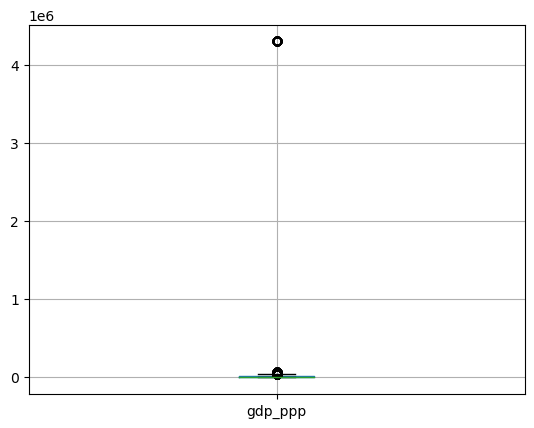

In [427]:
df.boxplot(column='gdp_ppp')

Top 5 countries according to gdp

In [428]:
df.groupby('country_name').first().nlargest(5,'gdp_ppp')

,country_code,population,quantile,income,gdp_ppp
country_name,,,,,
Fiji,FJI,896731.0,1,308.17334,4300332.0
Luxembourg,LUX,488650.0,1,5780.83740,73127.0
Norway,NOR,4768212.0,1,3520.26150,49070.0
United States,USA,304093966.0,1,663.47610,43261.0
Ireland,IRL,4489544.0,1,2819.13500,39268.0


Seems like there was a typo in Fiji's gdp ppp. After consulting the wold bank website I believe the value is supposed to be 4,300. 

In [429]:
df.loc[df['country_code']== 'FJI','gdp_ppp'] = 4300

Checking the histogram of values again:

<Axes: >

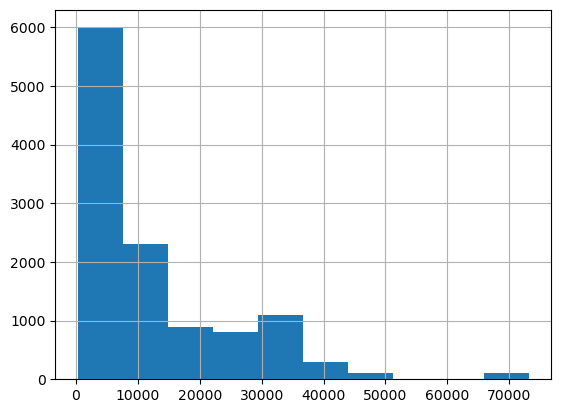

In [430]:
df['gdp_ppp'].hist()

Bottom 5 countries according to gdp

In [431]:
df.groupby('country_name').first().nsmallest(5,'gdp_ppp')

,country_code,population,quantile,income,gdp_ppp
country_name,,,,,
"Congo, Dem. Rep.",COD,62249724.0,1,29.364283,303.19305
Liberia,LBR,3783887.0,1,37.782673,372.00000
Niger,NER,15455175.0,1,137.395310,631.00000
Central African Republic,CAF,4467233.0,1,40.928130,685.00000
Malawi,MWI,13889423.0,1,115.632480,728.81158


These values seem correct.

# Gini df

In [432]:
gini = pd.read_csv('raw_data/gini.csv',skiprows=4)

In [433]:
gini.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cleaning

In [434]:
# Initialize lists to store the results
countries = []
values = []
years = []

# Loop through each row (each country)
for index, row in gini.iterrows():
    country_name = row['Country Name']
    country_data = row.drop(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'])
    
    # Drop NaN values and convert the index to integers (years)
    non_null_data = country_data.dropna()
    
    # Proceed only if there are non-null values
    if not non_null_data.empty:
        # Find the year closest to 2008 with a non-null value
        year_closest_to_2008 = min(non_null_data.index, key=lambda x: abs(int(x) - 2008))
        value_closest_to_2008 = row[year_closest_to_2008]
        
        # Store the results
        countries.append(country_name)
        values.append(value_closest_to_2008)
        years.append(year_closest_to_2008)
    else:
        # Store the results as NaN if there are no non-null values
        countries.append(country_name)
        values.append(None)
        years.append(None)

# Create a new DataFrame with the results
gini_df = pd.DataFrame({
    'country_name': countries,
    'gini': values,
    'gini_year': years
})

# Display the result
gini_df

,country_name,gini,gini_year
0,Aruba,NaN,None
1,Africa Eastern and Southern,NaN,None
2,Afghanistan,NaN,None
3,Africa Western and Central,NaN,None
4,Angola,42.7,2008
...,...,...,...
261,Kosovo,31.8,2009
262,"Yemen, Rep.",34.7,2005
263,South Africa,63.0,2008
264,Zambia,54.6,2006


## Merging

In [435]:
df = pd.merge(df,gini_df, on = 'country_name')

In [436]:
df.head(2)

,country_name,country_code,population,quantile,income,gdp_ppp,gini,gini_year
0,Albania,ALB,2947314.0,1,728.89795,7297.0,30.0,2008
1,Albania,ALB,2947314.0,2,916.66235,7297.0,30.0,2008


## Correcting or replacing values

Let's see if there are values that we would have to correct. 
 1. because they are too far from 2008, I can check it based on the year_survey column
 2. because they are missing

<Axes: >

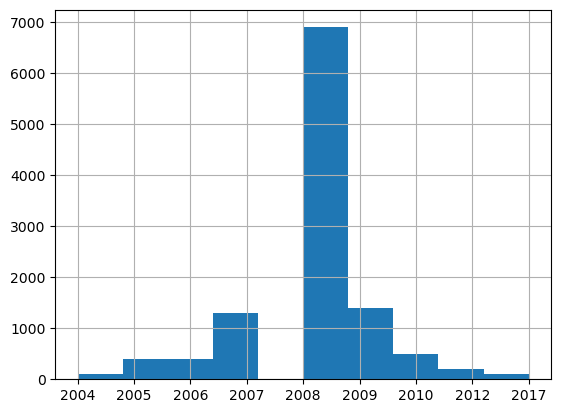

In [437]:
# Checking that values are not too far off from 2008.
df.sort_values(by='gini_year')['gini_year'].hist()

The values are not too far from the year.

Checking missing values

In [438]:
df[df.isna().any(axis=1)]

,country_name,country_code,population,quantile,income,gdp_ppp,gini,gini_year
5600,Cambodia,KHM,13943888.0,1,345.87497,1802.0,NaN,None
5601,Cambodia,KHM,13943888.0,2,437.74557,1802.0,NaN,None
5602,Cambodia,KHM,13943888.0,3,481.92444,1802.0,NaN,None
5603,Cambodia,KHM,13943888.0,4,514.47370,1802.0,NaN,None
5604,Cambodia,KHM,13943888.0,5,540.41986,1802.0,NaN,None
...,...,...,...,...,...,...,...,...
5695,Cambodia,KHM,13943888.0,96,3425.02400,1802.0,NaN,None
5696,Cambodia,KHM,13943888.0,97,3699.99850,1802.0,NaN,None
5697,Cambodia,KHM,13943888.0,98,4184.60550,1802.0,NaN,None
5698,Cambodia,KHM,13943888.0,99,4790.81250,1802.0,NaN,None


The gini idex for cambodia in 2008 was 35.10

Source: https://fred.stlouisfed.org/series/SIPOVGINIKHM 

In [439]:
df.loc[df['country_name'] == 'Cambodia', 'gini'] = 35.10

In [440]:
df[df['country_name'] == 'Cambodia']

,country_name,country_code,population,quantile,income,gdp_ppp,gini,gini_year
5600,Cambodia,KHM,13943888.0,1,345.87497,1802.0,35.1,None
5601,Cambodia,KHM,13943888.0,2,437.74557,1802.0,35.1,None
5602,Cambodia,KHM,13943888.0,3,481.92444,1802.0,35.1,None
5603,Cambodia,KHM,13943888.0,4,514.47370,1802.0,35.1,None
5604,Cambodia,KHM,13943888.0,5,540.41986,1802.0,35.1,None
...,...,...,...,...,...,...,...,...
5695,Cambodia,KHM,13943888.0,96,3425.02400,1802.0,35.1,None
5696,Cambodia,KHM,13943888.0,97,3699.99850,1802.0,35.1,None
5697,Cambodia,KHM,13943888.0,98,4184.60550,1802.0,35.1,None
5698,Cambodia,KHM,13943888.0,99,4790.81250,1802.0,35.1,None


I will only keep the essential columns

In [441]:
df = df.drop(columns= ['gini_year'])

In [442]:
df.head(2)

,country_name,country_code,population,quantile,income,gdp_ppp,gini
0,Albania,ALB,2947314.0,1,728.89795,7297.0,30.0
1,Albania,ALB,2947314.0,2,916.66235,7297.0,30.0


## Missing quantile

df.shape()

In [443]:
df.shape

(11399, 7)

In [444]:
# Calculate the value counts for the 'quantile' column
quantile_counts = df['quantile'].value_counts()

# Find the quantile value(s) that have counts of 113 and 114
quantile_values_with_113_counts = quantile_counts[quantile_counts == 113].index
quantile_values_with_114_counts = quantile_counts[quantile_counts == 114].index

# Filter the DataFrame for rows where 'quantile' is in the quantile_values_with_113_counts and quantile_values_with_114_counts
rows_with_113_count = df[df['quantile'].isin(quantile_values_with_113_counts)]
rows_with_114_count = df[df['quantile'].isin(quantile_values_with_114_counts)]

# Extract sets of countries for both groups
countries_with_113_count = set(rows_with_113_count['country_name'])
countries_with_114_count = set(rows_with_114_count['country_name'])

# Find the country present in one group but not the other
unique_to_113 = countries_with_113_count - countries_with_114_count
unique_to_114 = countries_with_114_count - countries_with_113_count

# Print results
print("Country present in 113 group but not in 114 group:", unique_to_113)
print("Country present in 114 group but not in 113 group:", unique_to_114)


Country present in 113 group but not in 114 group: set()
Country present in 114 group but not in 113 group: {'Lithuania'}


In [445]:
quantile_counts[quantile_counts == 113].index


Index([41], dtype='int64', name='quantile')

In [446]:
df[df['country_name']  == 'Lithuania']['quantile'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100], dtype=int64)

As you can see, the 41th percentile is missing. Let's add it:

In [447]:
# Identify rows for the mean
lithuania_two_rows= df[(df['country_name'] == 'Lithuania') & (df['quantile'].isin([40, 42]))]


# Compute the median income for quantiles 1 and 3
l_mean = lithuania_two_rows['income'].mean()
l_population = lithuania_two_rows['population'].mean()
l_gdp_ppp =  lithuania_two_rows['gdp_ppp'].mean().astype(int)
l_gini = lithuania_two_rows['gini'].mean()

# Create the new row for quantile 2
new_row = {
    'country_name': 'Lithuania',
    'country_code': 'LTU',
    'population': l_population,
    'quantile': 41,
    'income': l_mean,
    'gdp_ppp': l_gdp_ppp,
    'gini': l_gini
}

# Making the new row into a DataFrame
new_row_df = pd.DataFrame([new_row])

# Merging it with original
df = pd.concat([df, new_row_df], ignore_index=True)

# Sort the DataFrame by country_name and quantile to maintain order
df = df.sort_values(by=['country_name', 'quantile']).reset_index(drop=True)


Let's check if it worked:

In [448]:
df[df['country_name']  == 'Lithuania']['quantile'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100], dtype=int64)

In [449]:
df[(df['country_name'] == 'Lithuania') & (df['quantile'] == 41)]

,country_name,country_code,population,quantile,income,gdp_ppp,gini
6240,Lithuania,LTU,3198231.0,41,4882.14065,17571.0,35.7


Some of the columns are not numerical and we will need them to be so lets change that:

In [450]:
df.dtypes

country_name     object
country_code     object
population      float64
quantile          int64
income          float64
gdp_ppp         float64
gini            float64
dtype: object

In [451]:
numeric_columns = ['population','quantile','income', 'gdp_ppp', 'gini']

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col].fillna(0, inplace=True)  # Fill NaN values with 0 or handle as needed

# 2. Convert columns to integer type
df[numeric_columns] = df[numeric_columns].astype(int)


In [452]:
df.dtypes

country_name    object
country_code    object
population       int32
quantile         int32
income           int32
gdp_ppp          int32
gini             int32
dtype: object

# Task 1

Number of countries involved.

In [453]:
df['country_code'].nunique()

114

Population covered by the dataset (percentage of world population).

In [454]:
df_pop = df.groupby('country_code')['population'].first().sum()
df_pop

6220897530

In [455]:
world_pop = 6801000000

population_covered = df_pop/world_pop*100
population_covered

91.47033568592853

Why the $PPP adjusted GDP values are a good method to compare countries.

It is a useful measurment because it adjusts for the cost of living instead of just lookin at the absolute values
If it wasn't adjusted the value would loose relevance in the local context

A graph showing how diverse countries are in terms of income distribution. This graph must represent the income (y-axis, on a log scale) as a function of income class (x-axis) for 5 to 10 countries. Please ensure you represent a diversity of cases. Among the countries that must be present : your own country, and the two countries that have the greatest and lowest Gini index.
The Lorenz curve for these countries.

Greates gini index:

In [456]:
df.loc[df['gini'].idxmax()]


country_name    South Africa
country_code             ZAF
population          50565812
quantile                   1
income                    60
gdp_ppp                 9602
gini                      63
Name: 9400, dtype: object

Lowest gini index: 

In [457]:
df.loc[df['gini'].idxmin()]

country_name    Slovenia
country_code         SVN
population       2021316
quantile               1
income              2814
gdp_ppp            27197
gini                  23
Name: 9300, dtype: object

My country:

In [458]:
df[df['country_name'] == 'Hungary'].iloc[0]

country_name     Hungary
country_code         HUN
population      10038188
quantile               1
income              1211
gdp_ppp            18004
gini                  27
Name: 4400, dtype: object

4th selected country: 

In [459]:
df[df['country_name'] == 'Canada'].iloc[0]

country_name      Canada
country_code         CAN
population      33247118
quantile               1
income               122
gdp_ppp            35895
gini                  33
Name: 1600, dtype: object

5th selected country:

In [460]:
df[df['country_name'] == 'China'].iloc[0]

country_name         China
country_code           CHN
population      1324655000
quantile                 1
income                  16
gdp_ppp               5712
gini                    43
Name: 1900, dtype: object

In [461]:
# Data preparation:
countries = ['South Africa', 'Slovenia', 'Hungary', 'Canada', 'China']

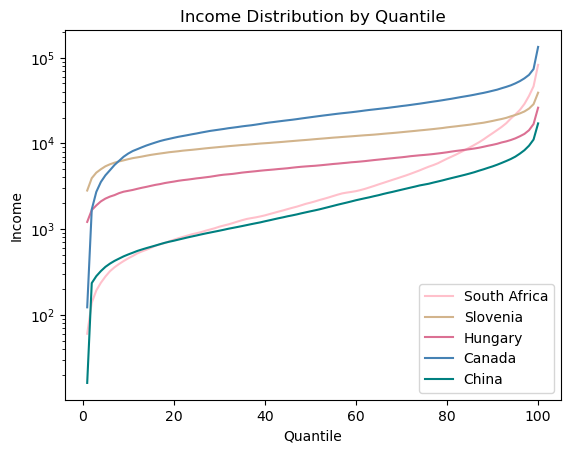

In [462]:
plt.figure()

colors = ['pink', 'tan', 'palevioletred', 'steelblue', 'teal']

for i, country in enumerate(countries):
    country_data = df[df['country_name'] == country]
    plt.plot(country_data['quantile'], country_data['income'], label=country, color=colors[i % len(colors)])

    
plt.yscale('log')  
plt.legend(loc='lower right')

plt.xlabel('Quantile')
plt.ylabel('Income')
plt.title('Income Distribution by Quantile')


plt.show()

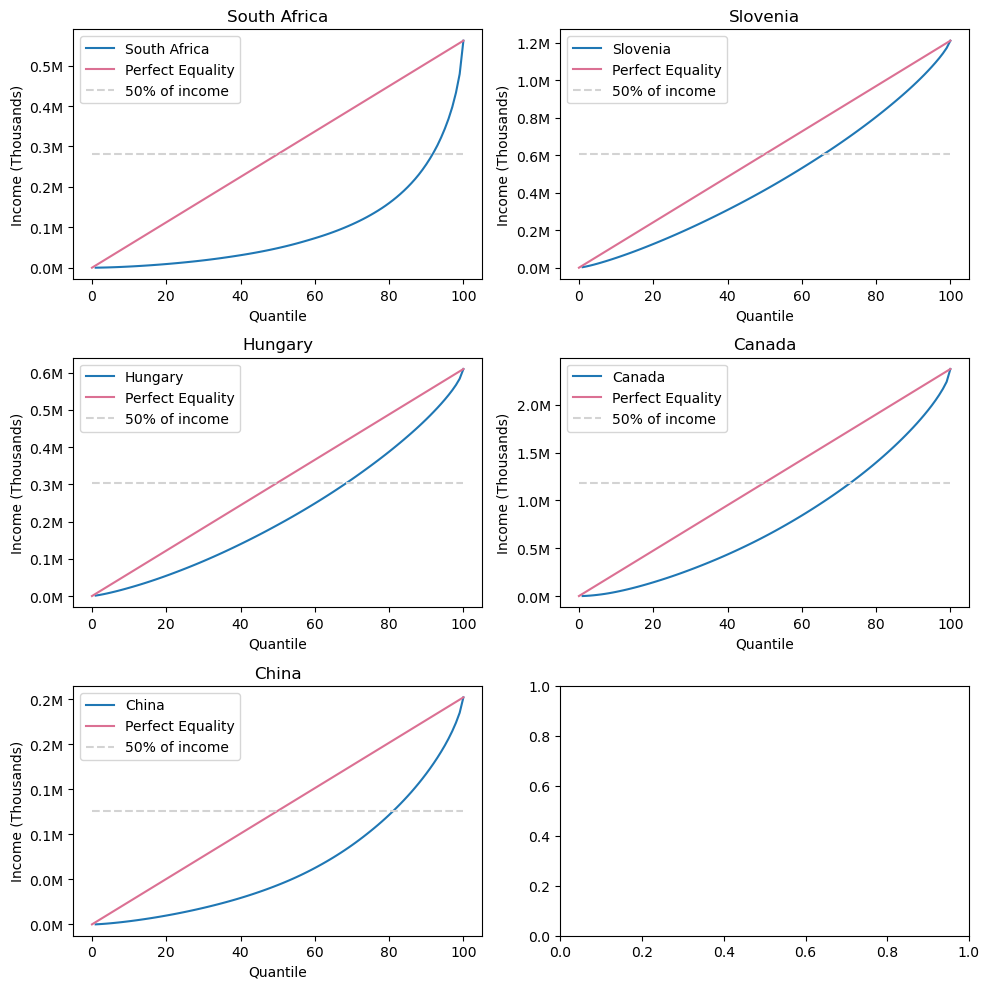

In [463]:
# Function to format y-axis labels
def million(x, pos):
    return f'{x * 1e-6:.1f}M'

fig, axes = plt.subplots(3, 2, figsize=(10, 10))

axes = axes.flatten()

for i, country in enumerate(countries):
    country_data = df[df['country_name'] == country]
    country_cumulative = country_data['income'].cumsum() 
    axes[i].plot(country_data['quantile'], country_cumulative, label=country)
    axes[i].set_xlabel('Quantile')
    axes[i].set_ylabel('Income (Thousands)')
    axes[i].set_title(str(country))
    axes[i].plot([0, 100], [0, country_cumulative.max()], label='Perfect Equality', color='palevioletred')
    axes[i].plot([0, 100], [country_cumulative.max() / 2, country_cumulative.max() / 2], label='50% of income', linestyle='dashed', color='lightgray')
    axes[i].yaxis.set_major_formatter(FuncFormatter(million))
    axes[i].legend()

plt.tight_layout()
plt.show()


In [465]:
df.to_csv('Task_1/df.csv')